In [21]:
!pip install qiskit
!pip install qiskit_aer
!pip install pylatexenc
!pip install qiskit qiskit-aer --upgrade


Initial state of qubit 0:


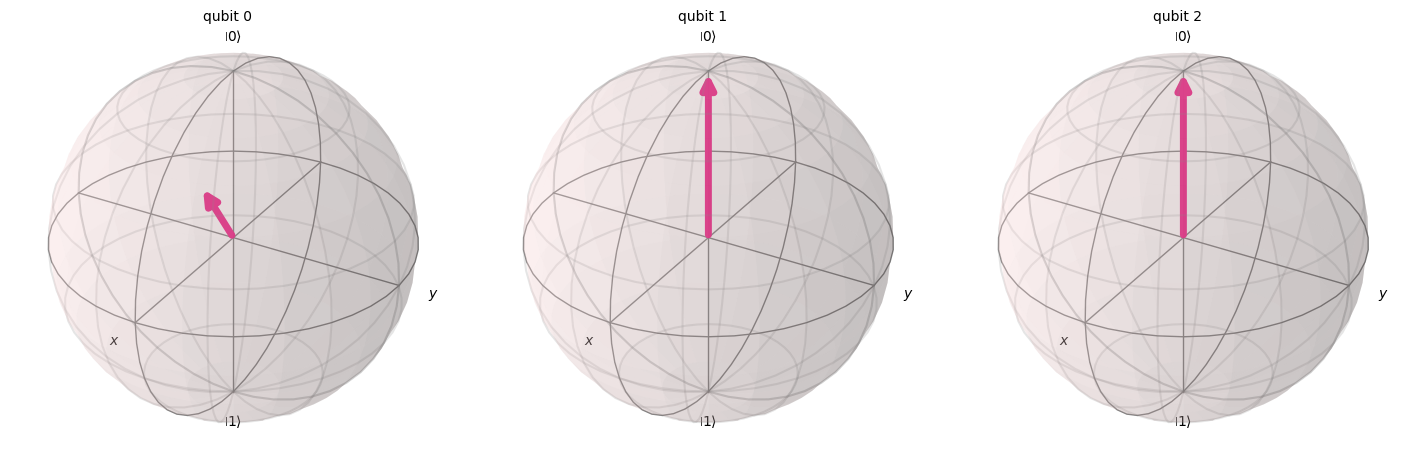

Fidelity between initial and teleported states: 1.000000

Bob’s final qubit (qubit 2) Bloch vector:


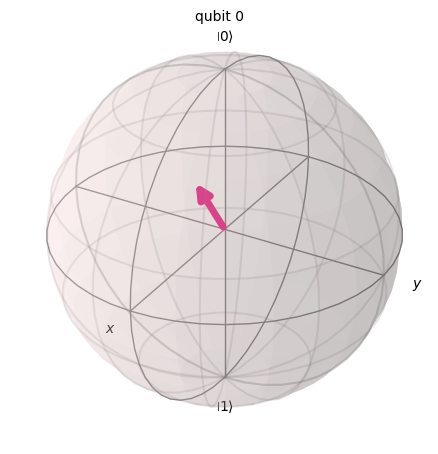

In [2]:
# Quantum Teleportation (Coherent version) – Qiskit 2.x compatible
# Works on modern qiskit-aer simulators

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector, partial_trace
from qiskit.visualization import plot_bloch_multivector
import numpy as np
import matplotlib.pyplot as plt

# 1️⃣ Build the teleportation circuit
qc = QuantumCircuit(3)

# Prepare arbitrary state |ψ⟩ on qubit 0
theta, phi = 0.8, 0.3
qc.ry(theta, 0)
qc.rz(phi, 0)

# Save initial state for comparison
sv_initial = Statevector.from_instruction(qc)
print("Initial state of qubit 0:")
display(plot_bloch_multivector(sv_initial))

# Create Bell pair between qubits 1 and 2
qc.h(1)
qc.cx(1, 2)

# Bell measurement part (but coherent)
qc.cx(0, 1)
qc.h(0)

# Coherent corrections
qc.cx(1, 2)
qc.cz(0, 2)

# Save final statevector explicitly (Qiskit 2.x requires this)
qc.save_statevector()

# 2️⃣ Simulate
sim = AerSimulator()
compiled = transpile(qc, sim)
result = sim.run(compiled).result()

# Retrieve the saved statevector
sv_final = result.data(0)["statevector"]
sv_final = Statevector(sv_final)

# 3️⃣ Compare: initial vs Bob’s (qubit 2) final state
rho_bob = partial_trace(sv_final, [0, 1])
rho_init = partial_trace(sv_initial, [1, 2])

# Extract the dominant pure states (since both should be pure)
eigvals_b, eigvecs_b = np.linalg.eigh(rho_bob.data)
eigvals_i, eigvecs_i = np.linalg.eigh(rho_init.data)
bob_state = eigvecs_b[:, np.argmax(eigvals_b)]
init_state = eigvecs_i[:, np.argmax(eigvals_i)]

# Compute fidelity
fidelity = np.abs(np.vdot(init_state, bob_state)) ** 2
print(f"Fidelity between initial and teleported states: {fidelity:.6f}")

# 4️⃣ Visualize Bloch spheres (fixed)
print("\nBob’s final qubit (qubit 2) Bloch vector:")

# Convert rho_bob (DensityMatrix) → pure statevector (dominant eigenvector)
eigvals_b, eigvecs_b = np.linalg.eigh(rho_bob.data)
bob_state = eigvecs_b[:, np.argmax(eigvals_b)]  # dominant eigenvector
bob_sv = Statevector(bob_state)

display(plot_bloch_multivector(bob_sv))

#Task 1


θ = 0.785, φ = 0.785


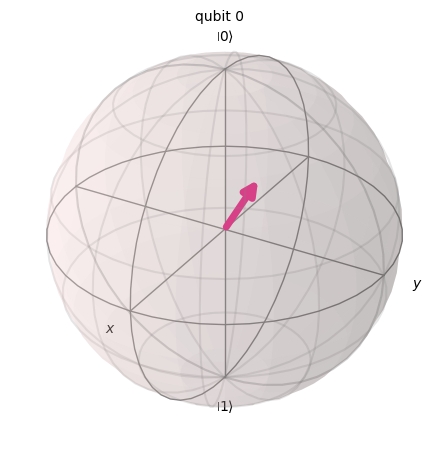


θ = 0.785, φ = 1.571


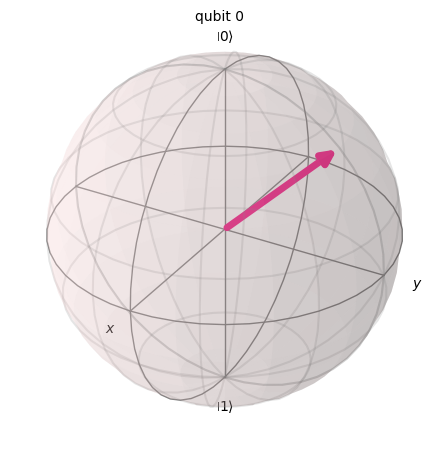


θ = 1.571, φ = 1.571


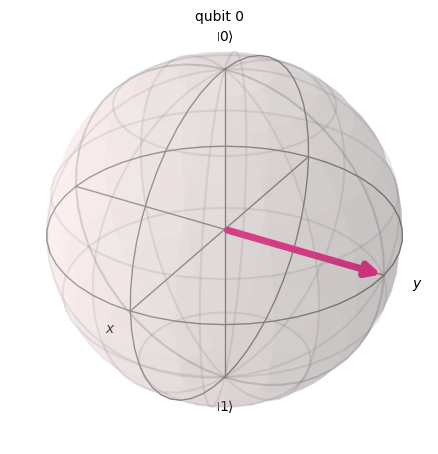


θ = 1.571, φ = 3.142


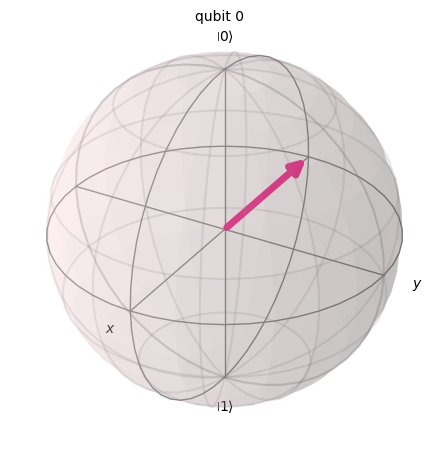


θ = 1.047, φ = 0.628


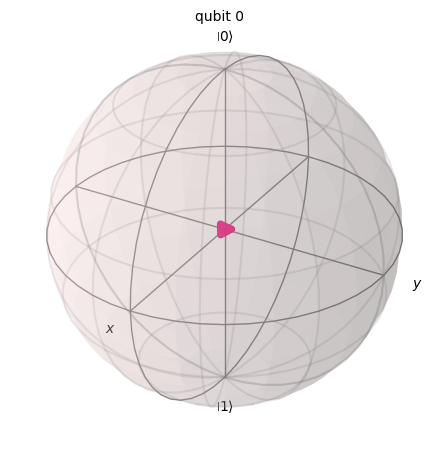

In [4]:
# List of (theta, phi) pairs to test
test_states = [
    (np.pi/4, np.pi/4),
    (np.pi/4, np.pi/2),
    (np.pi/2, np.pi/2),
    (np.pi/2, np.pi),
    (np.pi/3, np.pi/5)
]

for theta, phi in test_states:
    qc = QuantumCircuit(3)

    # Prepare |ψ⟩ on qubit 0
    qc.ry(theta, 0)
    qc.rz(phi, 0)

    # Save original state
    sv_initial = Statevector.from_instruction(qc)

    # Bell pair creation
    qc.h(1)
    qc.cx(1, 2)

    # Bell measurement (coherent)
    qc.cx(0, 1)
    qc.h(0)

    # Coherent teleportation corrections
    qc.cx(1, 2)
    qc.cz(0, 2)

    qc.save_statevector()
    sim = AerSimulator()
    result = sim.run(transpile(qc, sim)).result()
    sv_final = Statevector(result.data(0)["statevector"])

    # Extract Bob's qubit (qubit 2)
    rho_bob = partial_trace(sv_final, [0, 1])
    eigvals_b, eigvecs_b = np.linalg.eigh(rho_bob.data)
    bob_state = eigvecs_b[:, np.argmax(eigvals_b)]
    bob_sv = Statevector(bob_state)

    # Print tested values
    print(f"\nθ = {theta:.3f}, φ = {phi:.3f}")
    display(plot_bloch_multivector(bob_sv))


# Task **2**

In [6]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit import transpile

qc = QuantumCircuit(3, 2)

# Prepare unknown state on qubit 0
qc.ry(0.8, 0)
qc.rz(0.3, 0)

# Create Bell pair between qubits 1 and 2
qc.h(1)
qc.cx(1, 2)

# Bell measurement
qc.cx(0, 1)
qc.h(0)

# Measure qubits 0 and 1
qc.measure(0, 0)
qc.measure(1, 1)

# Conditional corrections using if_test (Qiskit 2.x syntax)

# If classical bit1 == 1 → apply X on qubit2
with qc.if_test((qc.clbits[1], 1)):
    qc.x(2)

# If classical bit0 == 1 → apply Z on qubit2
with qc.if_test((qc.clbits[0], 1)):
    qc.z(2)

sim = AerSimulator()
result = sim.run(transpile(qc, sim), shots=1000).result()
print(result.get_counts())


{'10': 251, '00': 250, '11': 264, '01': 235}


# Task **3**

Average Fidelity: 1.0
Fidelities: [np.float64(0.9999999999999996), np.float64(0.9999999999999998), np.float64(1.0), np.float64(0.9999999999999998), np.float64(0.9999999999999996), np.float64(1.0000000000000004), np.float64(1.0), np.float64(0.9999999999999998), np.float64(1.0000000000000004), np.float64(1.0000000000000004), np.float64(1.0000000000000009), np.float64(0.9999999999999996), np.float64(0.9999999999999998), np.float64(0.9999999999999998), np.float64(0.9999999999999998), np.float64(1.0), np.float64(1.0), np.float64(1.0000000000000004), np.float64(0.9999999999999991), np.float64(1.0)]


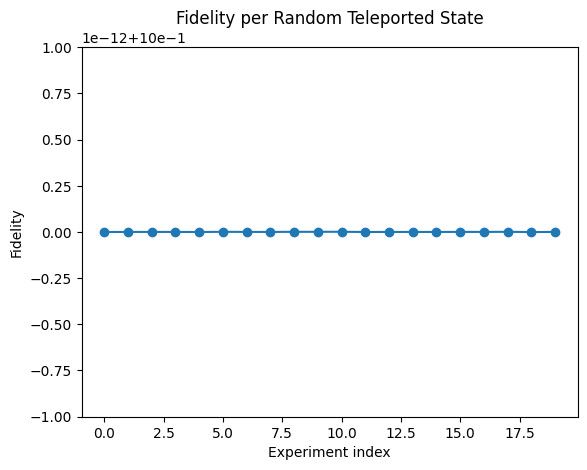

In [9]:
def teleport_fidelity(theta, phi):
    qc = QuantumCircuit(3)
    qc.ry(theta, 0)
    qc.rz(phi, 0)

    sv_initial = Statevector.from_instruction(qc)

    qc.h(1)
    qc.cx(1, 2)
    qc.cx(0, 1)
    qc.h(0)
    qc.cx(1, 2)
    qc.cz(0, 2)
    qc.save_statevector()

    sim = AerSimulator()
    result = sim.run(transpile(qc, sim)).result()
    sv_final = Statevector(result.data(0)["statevector"])

    rho_bob = partial_trace(sv_final, [0,1])
    rho_init = partial_trace(sv_initial, [1,2])

    e_b, v_b = np.linalg.eigh(rho_bob.data)
    e_i, v_i = np.linalg.eigh(rho_init.data)

    bob = v_b[:, np.argmax(e_b)]
    init = v_i[:, np.argmax(e_i)]

    return np.abs(np.vdot(init, bob))**2

# Run for random states
fidelities = []
for _ in range(20):
    th, ph = np.random.rand()*np.pi, np.random.rand()*2*np.pi
    fidelities.append(teleport_fidelity(th, ph))

print("Average Fidelity:", np.mean(fidelities))
print("Fidelities:", fidelities)

plt.plot(fidelities, marker='o')
plt.title("Fidelity per Random Teleported State")
plt.ylabel("Fidelity")
plt.xlabel("Experiment index")
plt.show()



# Task ***4***

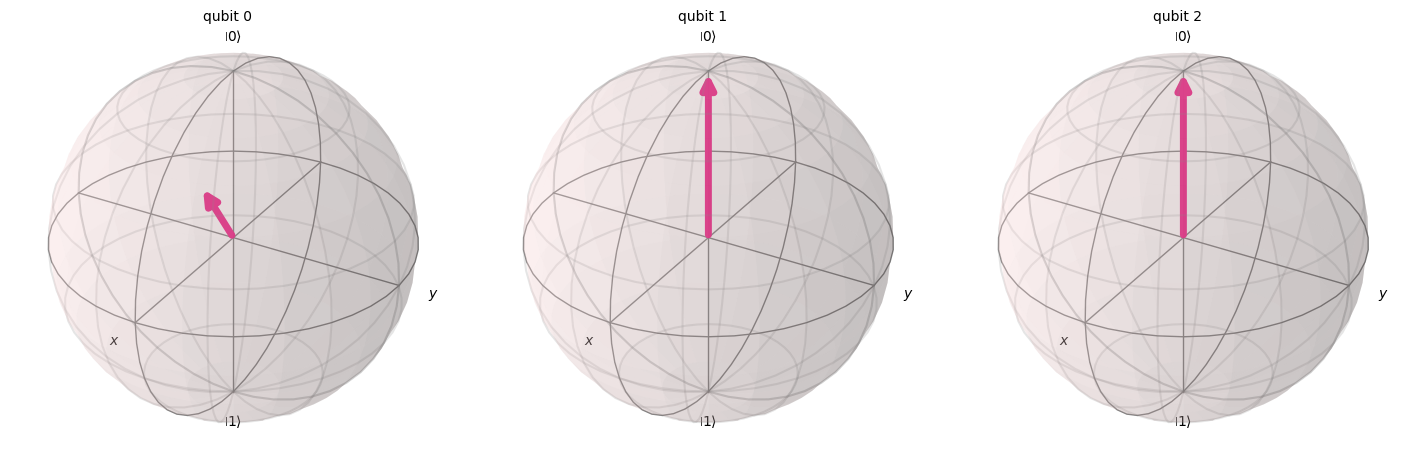

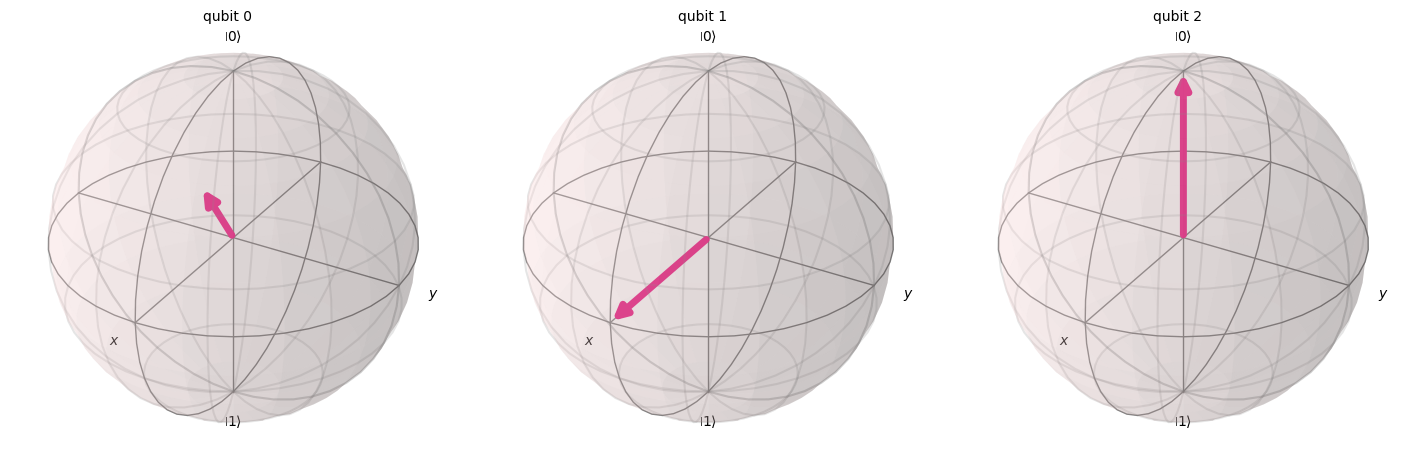

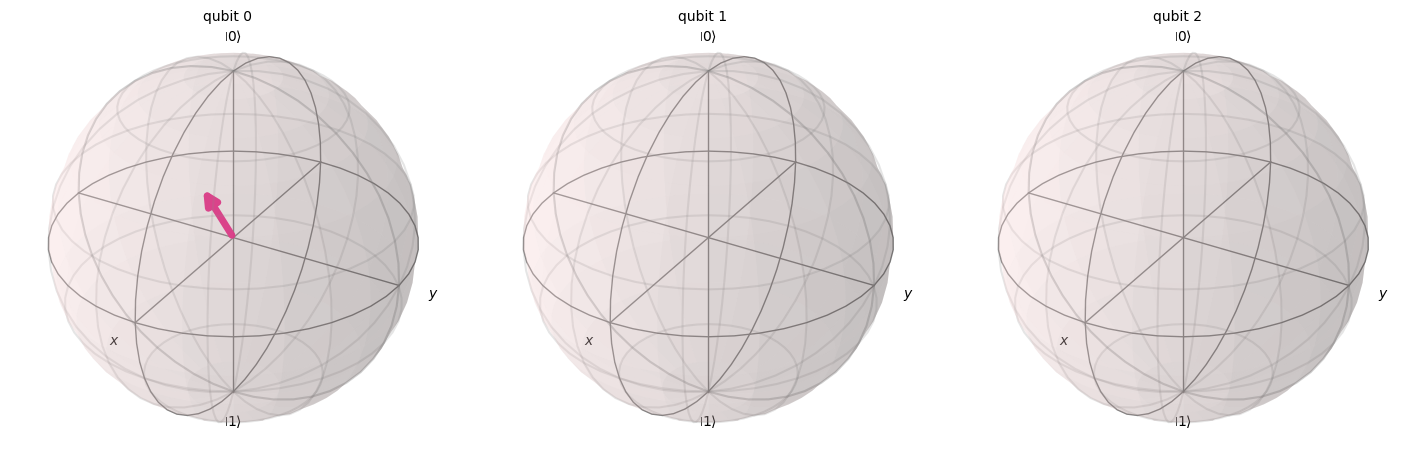

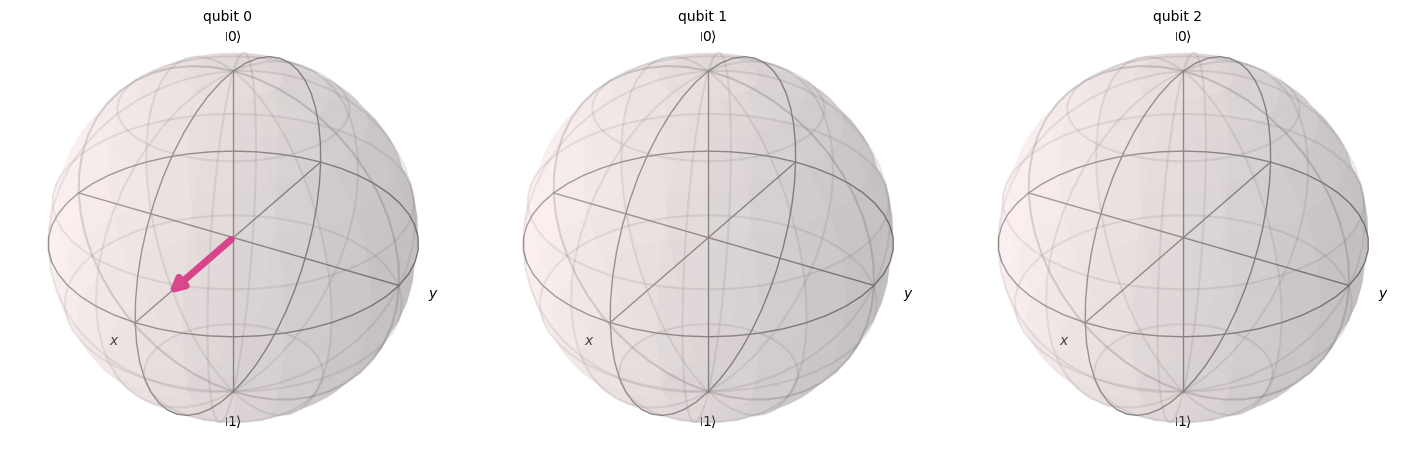

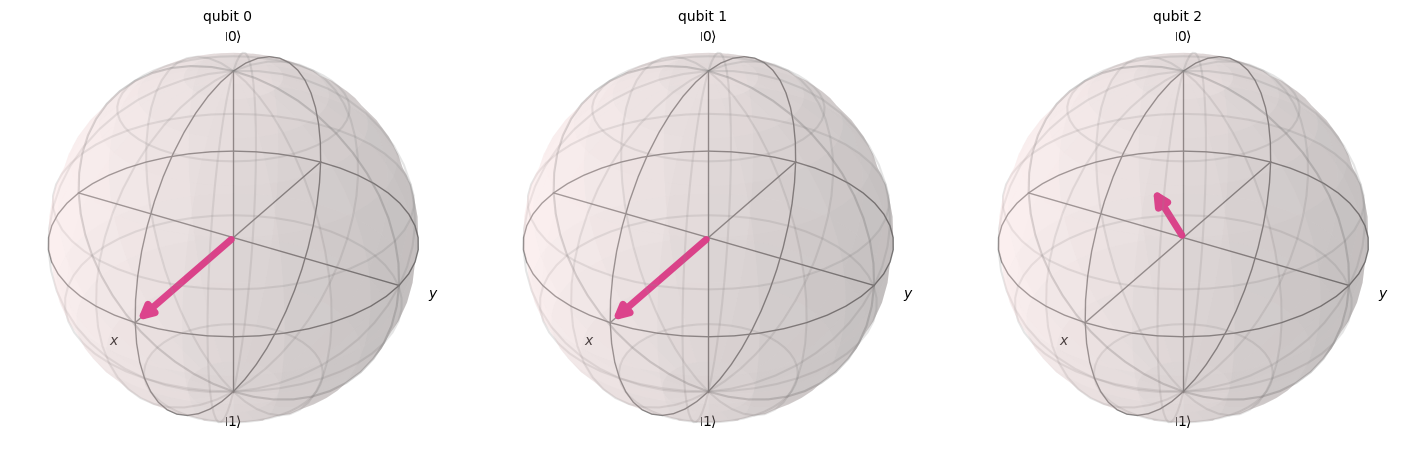

In [10]:
qc = QuantumCircuit(3)
qc.ry(0.8,0); qc.rz(0.3,0)
display(plot_bloch_multivector(Statevector.from_instruction(qc)))

qc.h(1)
display(plot_bloch_multivector(Statevector.from_instruction(qc)))

qc.cx(1,2)
display(plot_bloch_multivector(Statevector.from_instruction(qc)))

qc.cx(0,1); qc.h(0)
display(plot_bloch_multivector(Statevector.from_instruction(qc)))

qc.cx(1,2); qc.cz(0,2)
display(plot_bloch_multivector(Statevector.from_instruction(qc)))


# Task **5**

📡 Quantum Teleportation Fidelity Under Noise

Noise = 0.00  →  Fidelity = 1.0000
Noise = 0.01  →  Fidelity = 1.0000
Noise = 0.05  →  Fidelity = 1.0000
Noise = 0.10  →  Fidelity = 0.4854
Noise = 0.20  →  Fidelity = 0.0449

🔵 Bloch Sphere — Low Noise (0.01): Fidelity = 1.0000


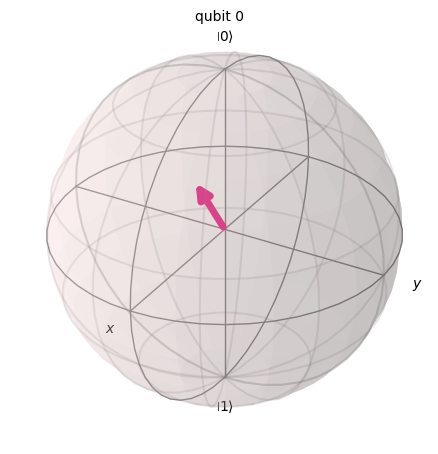


🔴 Bloch Sphere — High Noise (0.2): Fidelity = 0.4697


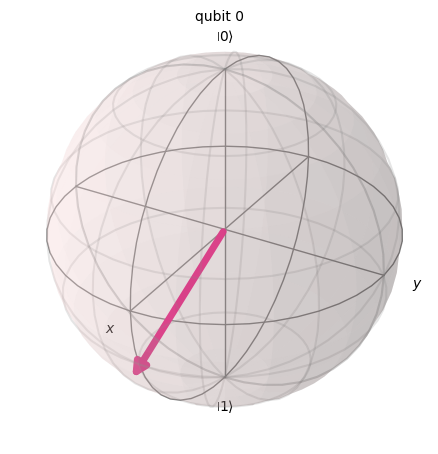

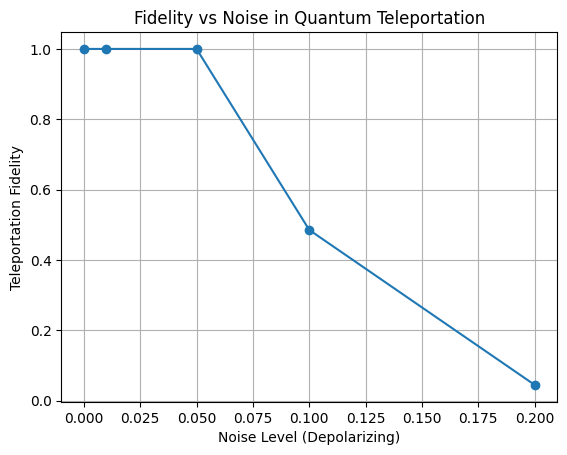

In [46]:


def teleport_and_fidelity(theta, noise):
    # ---- Noise Model ----
    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(depolarizing_error(noise, 1), ['x', 'h'])
    noise_model.add_all_qubit_quantum_error(depolarizing_error(noise, 2), ['cx'])

    # ---- Teleportation Circuit ----
    qc = QuantumCircuit(3)
    qc.ry(theta,0)
    qc.rz(0.3,0)
    sv_initial = Statevector.from_instruction(qc)

    qc.h(1); qc.cx(1,2)      # entangle
    qc.cx(0,1); qc.h(0)      # Bell measurement
    qc.cx(1,2); qc.cz(0,2)   # classical corrections embedded
    qc.save_statevector()

    sim = AerSimulator(noise_model=noise_model)
    result = sim.run(transpile(qc, sim)).result()
    sv_final = Statevector(result.data(0)["statevector"])

    # ---- Partial trace: Bob & initial state ----
    rho_bob = partial_trace(sv_final, [0,1])
    rho_init = partial_trace(sv_initial, [1,2])

    e_b, v_b = np.linalg.eigh(rho_bob.data)
    e_i, v_i = np.linalg.eigh(rho_init.data)

    bob = v_b[:, np.argmax(e_b)]
    init = v_i[:, np.argmax(e_i)]

    fidelity = np.abs(np.vdot(init, bob))**2
    return fidelity, init, bob


# ---- Parameters ----
noise_levels = [0, 0.01, 0.05, 0.1, 0.2]
theta = 0.8
fidelities = []

print("📡 Quantum Teleportation Fidelity Under Noise\n")
for n in noise_levels:
    f, _, _ = teleport_and_fidelity(theta, n)
    fidelities.append(f)
    print(f"Noise = {n:.2f}  →  Fidelity = {f:.4f}")

# ---- Bloch Sphere: low and high noise ----
low_noise = 0.01
high_noise = 0.20

f_low, init_low, bob_low = teleport_and_fidelity(theta, low_noise)
f_high, init_high, bob_high = teleport_and_fidelity(theta, high_noise)

print(f"\n🔵 Bloch Sphere — Low Noise ({low_noise}): Fidelity = {f_low:.4f}")
display(plot_bloch_multivector(Statevector(bob_low)))

print(f"\n🔴 Bloch Sphere — High Noise ({high_noise}): Fidelity = {f_high:.4f}")
display(plot_bloch_multivector(Statevector(bob_high)))

# ---- Plot Fidelity vs Noise ----
plt.figure()
plt.plot(noise_levels, fidelities, marker='o')
plt.xlabel("Noise Level (Depolarizing)")
plt.ylabel("Teleportation Fidelity")
plt.title("Fidelity vs Noise in Quantum Teleportation")
plt.grid(True)
plt.show()
